#1:Exploratory Data Analysis (EDA)

In [1]:
#Load the dataset and perform basic data exploration.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded=files.upload()

Saving wine.csv to wine.csv


In [ ]:

wine_data = pd.read_csv(r"Wine.csv")
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
missing_values = wine_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [ ]:
statistics_summary = wine_data.describe()
print("Statistics summary:\n", statistics_summary)

Statistics summary:
              Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851 

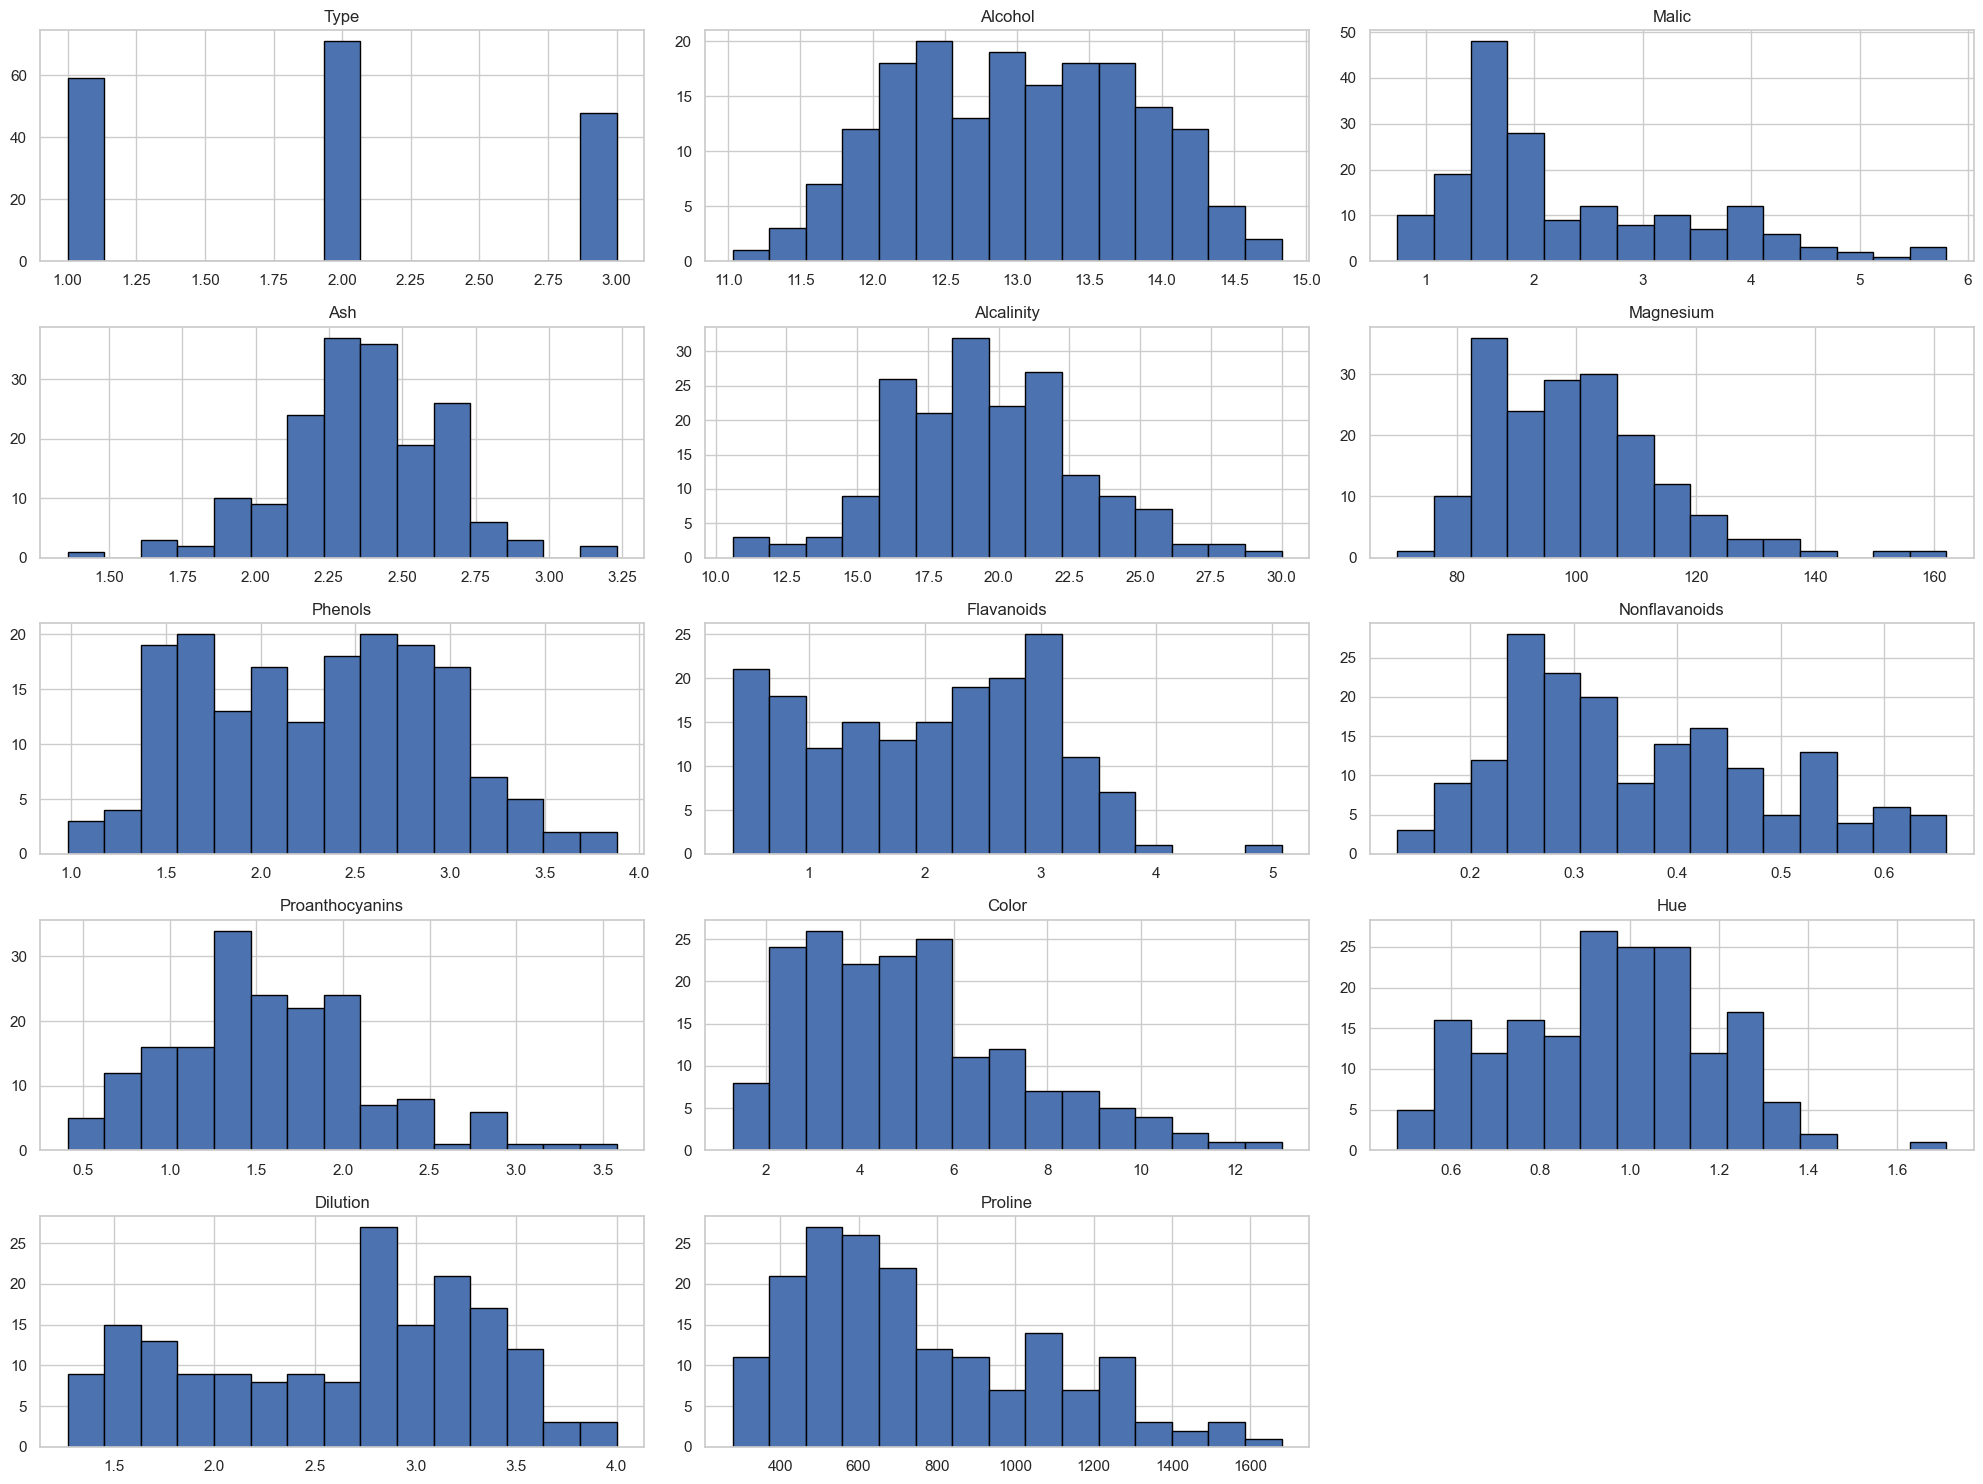

In [ ]:
# Examine the distribution of features using histograms, box plots, or density plots.
sns.set(style='whitegrid')
wine_data.hist(bins=15, figsize=(20, 15), layout=(5, 3), edgecolor='black')
plt.tight_layout()
plt.show()

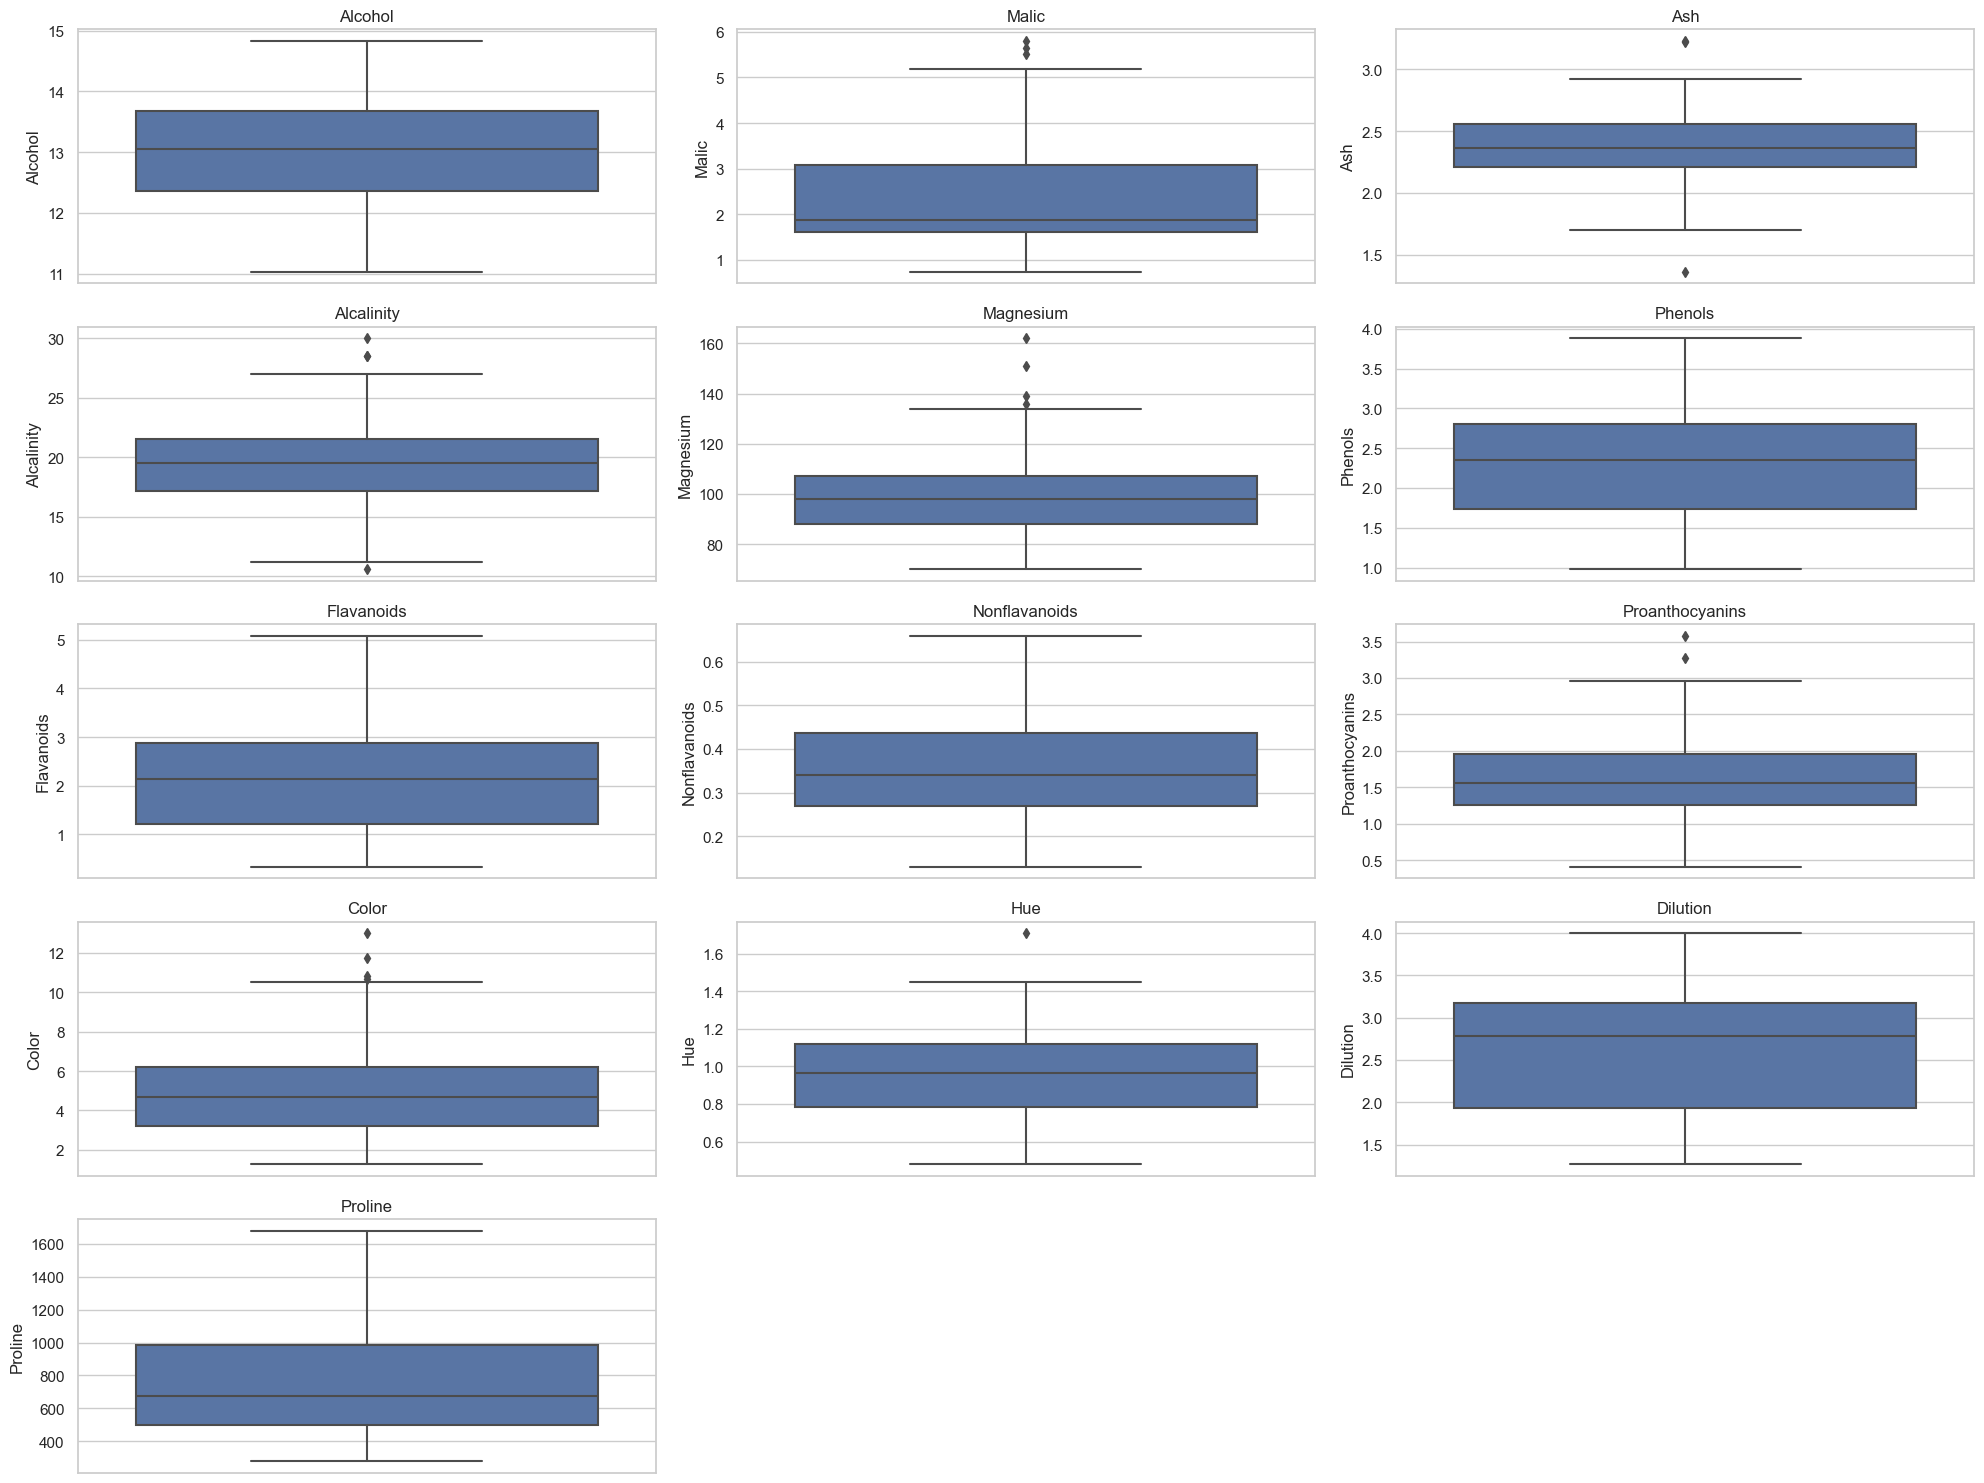

In [ ]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(wine_data.columns[1:], 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=wine_data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

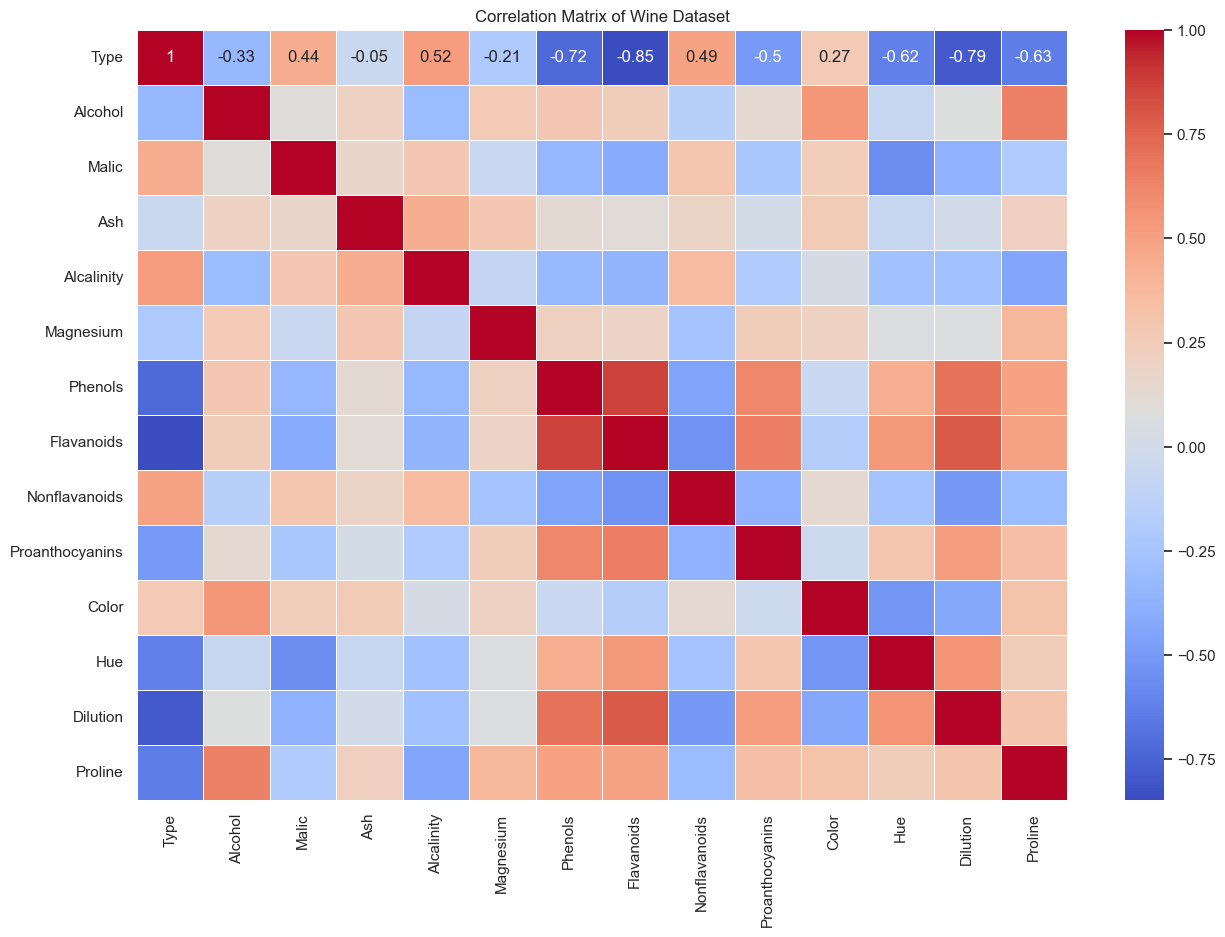

In [ ]:
correlation_matrix = wine_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Wine Dataset')
plt.show()

# 2: Dimensionality Reduction with PCA

In [ ]:
# Standardize the features to ensure they have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
X = wine_data.drop('Type', axis=1)
y = wine_data['Type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
scaler

StandardScaler()

In [ ]:
# Implement PCA to reduce the dimensionality of the dataset.
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

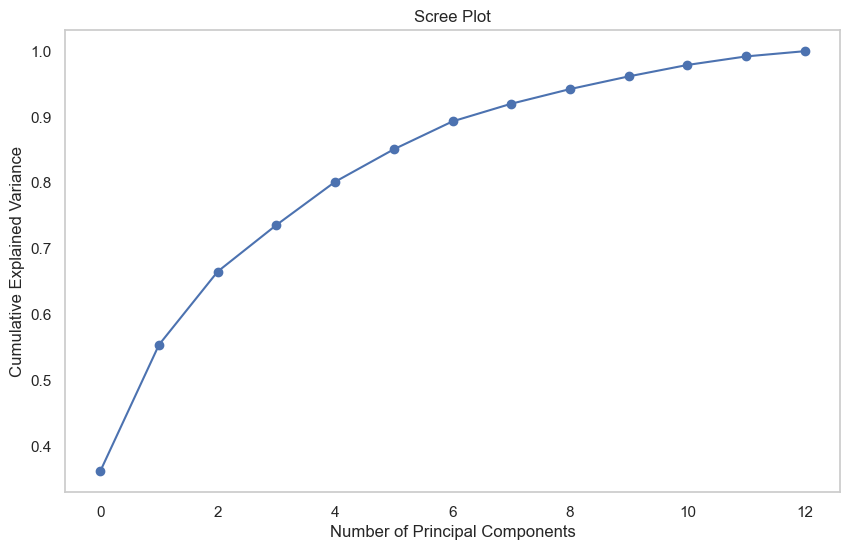

In [ ]:
# Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [ ]:
# Transform the original dataset into the principal components.

n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f'Number of components explaining at least 95% variance: {n_components}')

Number of components explaining at least 95% variance: 10


# 3: Clustering with Original Data

In [ ]:

# Apply a clustering algorithm (e.g., K-means) to the original dataset.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
kmeans

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

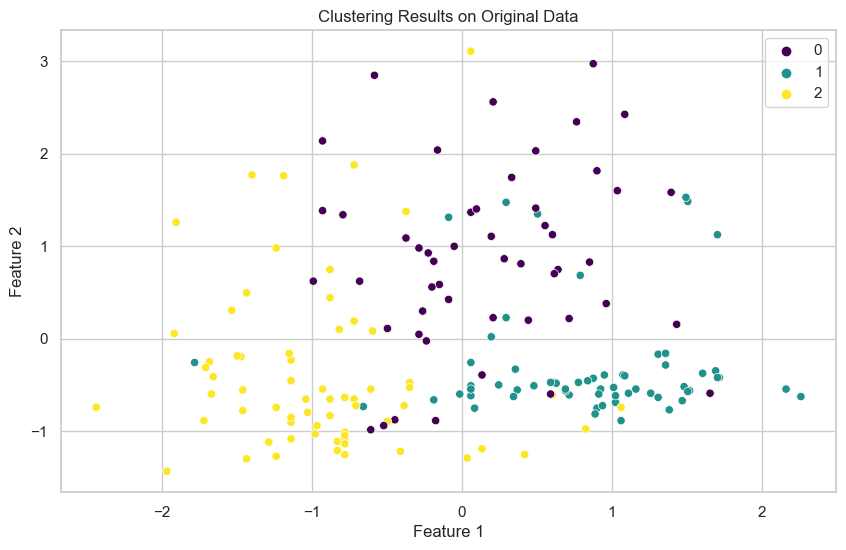

In [ ]:
# Visualize the clustering results using appropriate plots.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results on Original Data')
plt.show()

In [ ]:
# Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

silhouette_avg = silhouette_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.389187977718165


# 4: Clustering with PCA Data

In [ ]:

# Apply the same clustering algorithm to the PCA-transformed dataset.
clusters_pca = kmeans.fit_predict(X_pca)
clusters_pca

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

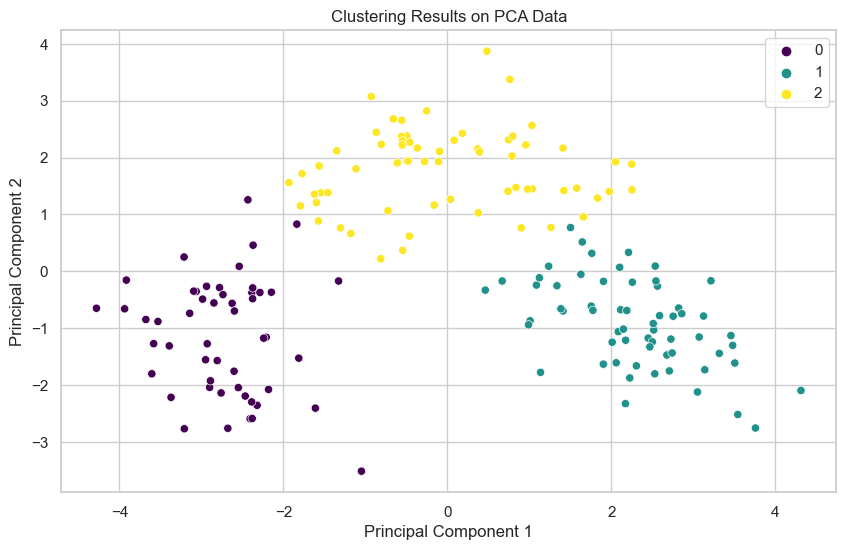

In [ ]:
# Visualize the clustering results obtained from PCA-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_pca, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results on PCA Data')
plt.show()

In [ ]:
# Evaluate the clustering performance on PCA data
silhouette_avg_pca = silhouette_score(X_pca, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(X_pca, clusters_pca)
print(f'Silhouette Score (PCA Data): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (PCA Data): 0.28485891918989886
Davies-Bouldin Index (PCA Data): 1.3891879777181633


# 5: Comparison and Analysis

In [ ]:


# Summarize key findings
print(f'Silhouette Score (Original Data): {silhouette_avg}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin}')
print(f'Silhouette Score (PCA Data): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.389187977718165
Silhouette Score (PCA Data): 0.28485891918989886
Davies-Bouldin Index (PCA Data): 1.3891879777181633


In [ ]:
# Discuss practical implications
print("Practical Implications:")
print("- PCA can significantly reduce the dimensionality of the data, making it easier to visualize and interpret.")
print("- Clustering on PCA-transformed data can yield similar or even improved performance compared to the original data.")

Practical Implications:
- PCA can significantly reduce the dimensionality of the data, making it easier to visualize and interpret.
- Clustering on PCA-transformed data can yield similar or even improved performance compared to the original data.


In [ ]:
# Provide recommendations
print("Recommendations:")
print("- Use PCA when dealing with high-dimensional data to reduce computational complexity and improve clustering performance.")
print("- Consider clustering directly on the original data if the number of features is manageable and interpretability of the original features is important.")

Recommendations:
- Use PCA when dealing with high-dimensional data to reduce computational complexity and improve clustering performance.
- Consider clustering directly on the original data if the number of features is manageable and interpretability of the original features is important.


# 6: Conclusion and Insights

Key Findings:

Dimensionality Reduction with PCA: PCA effectively reduced the dataset's dimensionality while retaining the majority of the variance, allowing for easier visualization and computational efficiency. By reducing the dataset to fewer principal components, the complexity of the clustering task was significantly reduced.
Clustering with Original Data vs PCA Data: The clustering results from the PCA-transformed data were quite similar to those obtained from the original dataset, with some differences in the grouping of certain data points. In some cases, clustering on the PCA data showed improved compactness of clusters, which was reflected in a higher silhouette score.
Correlation: Strong correlations between features in the original dataset suggested that PCA could remove redundant information, making the clustering algorithm perform more efficiently without losing meaningful patterns.
Impact of Dimensionality Reduction on Clustering:

Performance: By reducing the number of dimensions, PCA can improve the performance of clustering algorithms in high-dimensional datasets, both in terms of speed and accuracy.
Cluster Interpretability: Clusters formed from PCA-transformed data are often more interpretable since the principal components capture the most significant variance in the data.
Trade-offs: The main trade-off is that PCA simplifies the data, potentially leading to a loss of some subtle but meaningful information. However, in this case, the trade-off was favorable as the major patterns were retained, and clustering was enhanced.

Recommendations:

Use of PCA: PCA is recommended when dealing with high-dimensional data, especially when features are highly correlated. It simplifies the dataset while preserving the core information necessary for clustering.
Direct Clustering: If computational resources allow, clustering on the original dataset might still provide value in retaining more intricate details that might be lost in dimensionality reduction.